In [4]:
from IPython.core.interactiveshell import no_op
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

1.   Problem Definition
2.   Data Exploration (EDA)
3.   Data Cleaning & Preprocessing
4.   Modeling & Cross-validation
5.   Evalutaion & Conclusions



We want to predict whether a student enrolled in an online course will actually complete the course using demographics, course info, engagement, performance, and other types of data.
This is a binary classification problem, and the models will measure success using accuracy, precision, recall, and the F1 score.

In [5]:
df = pd.read_csv("Course_Completion_Prediction.csv")

# Exploratory Data Analysis

In [6]:
df.head()

,Student_ID,Name,Gender,Age,Education_Level,Employment_Status,City,Device_Type,Internet_Connection_Quality,Course_ID,...,Enrollment_Date,Payment_Mode,Fee_Paid,Discount_Used,Payment_Amount,App_Usage_Percentage,Reminder_Emails_Clicked,Support_Tickets_Raised,Satisfaction_Rating,Completed
0,STU100000,Vihaan Patel,Male,19,Diploma,Student,Indore,Laptop,Medium,C102,...,01-06-2024,Scholarship,No,No,1740,49,3,4,3.5,Completed
1,STU100001,Arjun Nair,Female,17,Bachelor,Student,Delhi,Laptop,Low,C106,...,27-04-2025,Credit Card,Yes,No,6147,86,0,0,4.5,Not Completed
2,STU100002,Aditya Bhardwaj,Female,34,Master,Student,Chennai,Mobile,Medium,C101,...,20-01-2024,NetBanking,Yes,No,4280,85,1,0,5.0,Completed
3,STU100003,Krishna Singh,Female,29,Diploma,Employed,Surat,Mobile,High,C105,...,13-05-2025,UPI,Yes,No,3812,42,2,3,3.8,Completed
4,STU100004,Krishna Nair,Female,19,Master,Self-Employed,Lucknow,Laptop,Medium,C106,...,19-12-2024,Debit Card,Yes,Yes,5486,91,3,0,4.0,Completed


The data consists of 100,000 entries of 40 unique features.
<br> There are no empty entries in the dataset and they consist of integers, floats, and strings.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 40 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Student_ID                    100000 non-null  object 
 1   Name                          100000 non-null  object 
 2   Gender                        100000 non-null  object 
 3   Age                           100000 non-null  int64  
 4   Education_Level               100000 non-null  object 
 5   Employment_Status             100000 non-null  object 
 6   City                          100000 non-null  object 
 7   Device_Type                   100000 non-null  object 
 8   Internet_Connection_Quality   100000 non-null  object 
 9   Course_ID                     100000 non-null  object 
 10  Course_Name                   100000 non-null  object 
 11  Category                      100000 non-null  object 
 12  Course_Level                  100000 non-null

In [8]:
print(df["Education_Level"].unique())
print(df["Employment_Status"].unique())
print(df["City"].unique().size)
print(df["Device_Type"].unique())
print(df["Device_Type"].unique())

['Diploma' 'Bachelor' 'Master' 'HighSchool' 'PhD']
['Student' 'Employed' 'Self-Employed' 'Unemployed']
15
['Laptop' 'Mobile' 'Tablet']
['Laptop' 'Mobile' 'Tablet']


Plotting and viewing correlation of all Numeric values in the dataframe

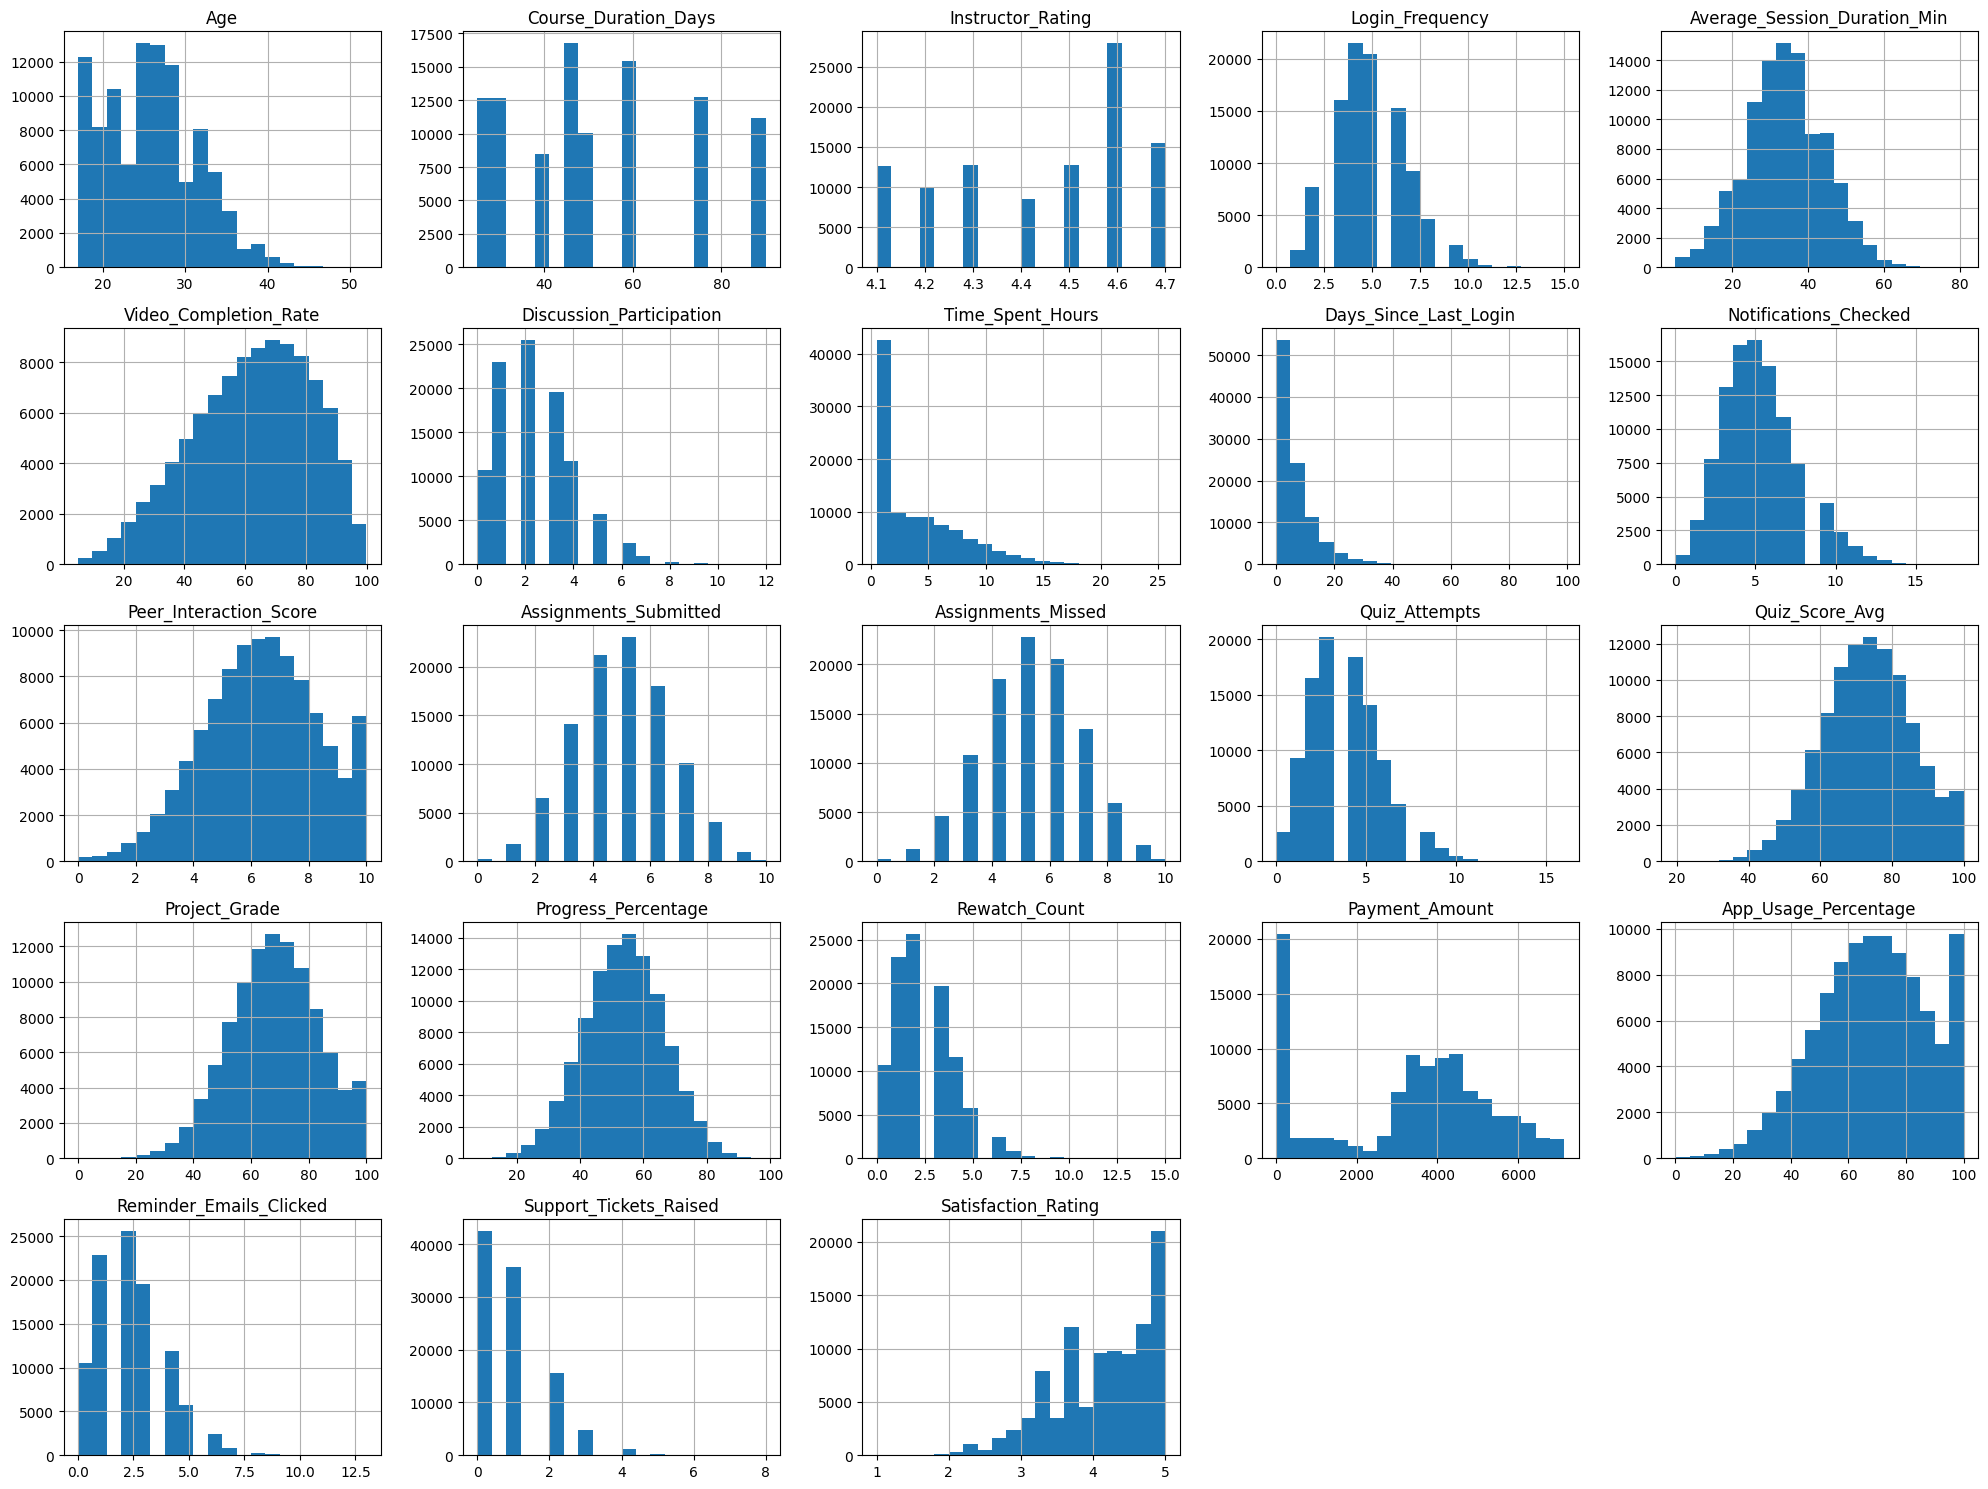

In [9]:
numeric_df = df.select_dtypes(include=['int64', 'float64'])
numeric_df.hist(bins=20, figsize=(20, 15))
plt.tight_layout()
plt.show()

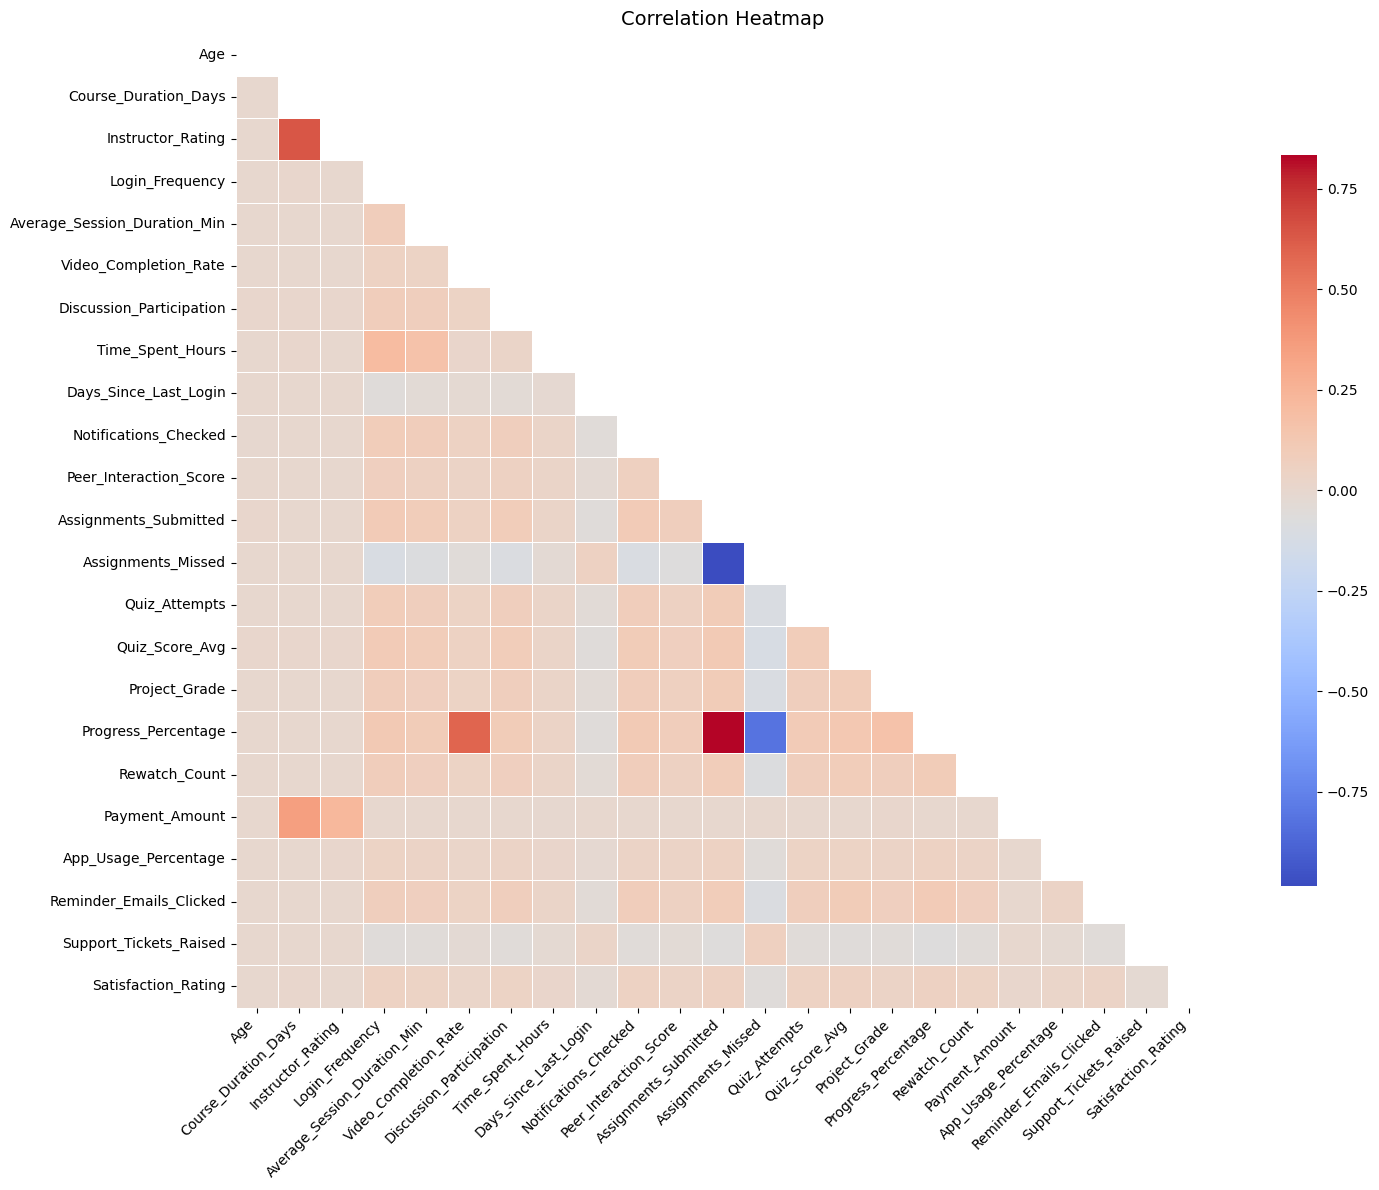

In [10]:
import seaborn as sns

plt.figure(figsize=(16, 12))  # Bigger figure
corr = numeric_df.corr()

# Mask the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

sns.heatmap(
    corr,
    mask=mask,
    annot=False,       # Turn off annotations for clarity
    cmap='coolwarm',
    square=True,
    linewidths=0.5,
    cbar_kws={"shrink": .75}
)

plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.title("Correlation Heatmap", fontsize=14)
plt.tight_layout()
plt.show()

# Task
Analyze the distribution of the 'Completed' column and visualize it using a count plot. Then, for the categorical features 'Gender', 'Education_Level', 'Device_Type', 'Category', and 'Course_Level', visualize their individual distributions and their relationship with the 'Completed' status using count plots or stacked bar charts, ensuring appropriate legends are included for all plots.

## Analyze Target Variable Distribution

### Subtask:
Visualize the distribution of the 'Completed' column using a count plot to understand the balance between completed and not completed courses.


**Reasoning**:
The previous code produced a `FutureWarning` regarding the use of `palette` without `hue`. To address this, I will modify the `sns.countplot` call to explicitly assign the 'Completed' column to the `hue` argument and set `legend=False`, as suggested by the warning, while retaining the specified `palette`.



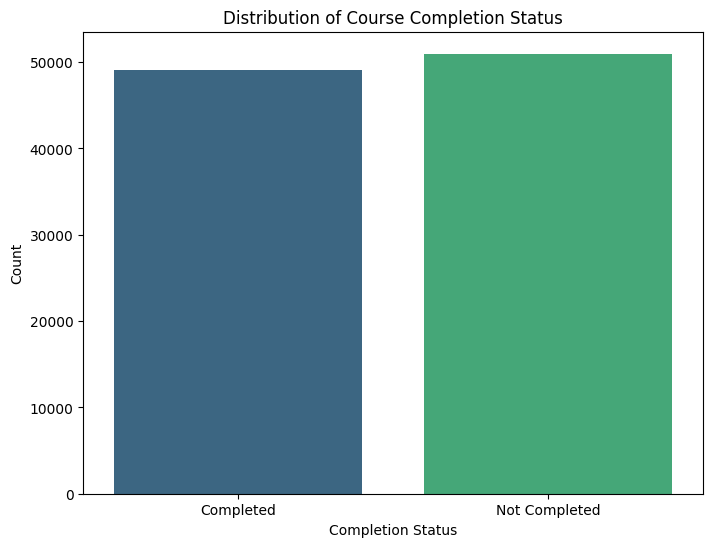

In [11]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Completed', hue='Completed', palette='viridis', legend=False)
plt.title('Distribution of Course Completion Status')
plt.xlabel('Completion Status')
plt.ylabel('Count')
plt.show()

## Explore Key Categorical Features

### Subtask:
Select important categorical features such as 'Gender', 'Education_Level', 'Device_Type', 'Category', and 'Course_Level'. For each, visualize its distribution and its relationship with the 'Completed' status using count plots or stacked bar charts, providing appropriate legends.


**Reasoning**:
I will create a list of the specified categorical features and then loop through each feature to generate count plots. For each plot, I'll set the feature on the x-axis, 'Completed' as the hue, add appropriate titles and labels, and display the plot as per the instructions.



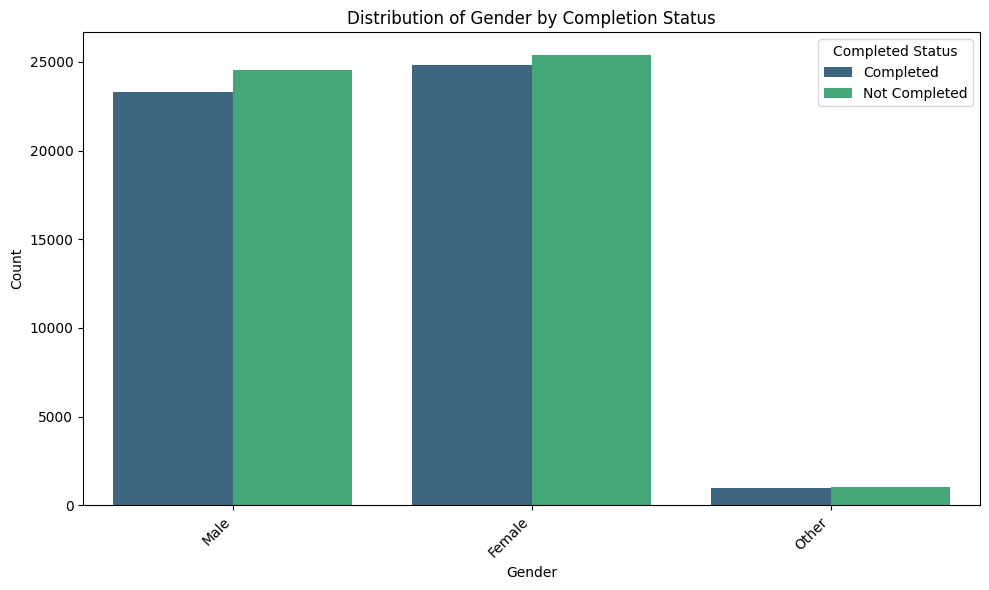

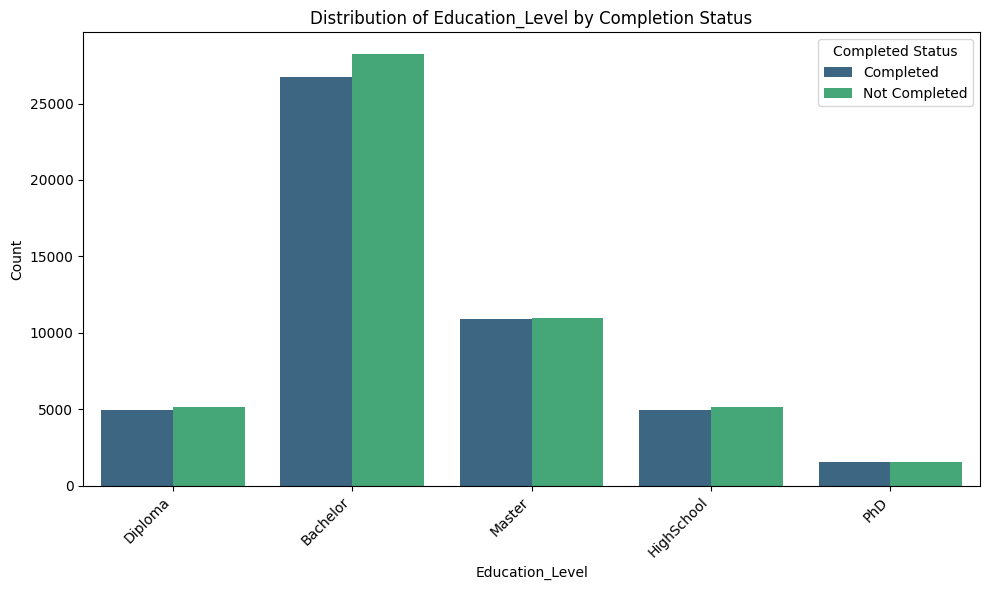

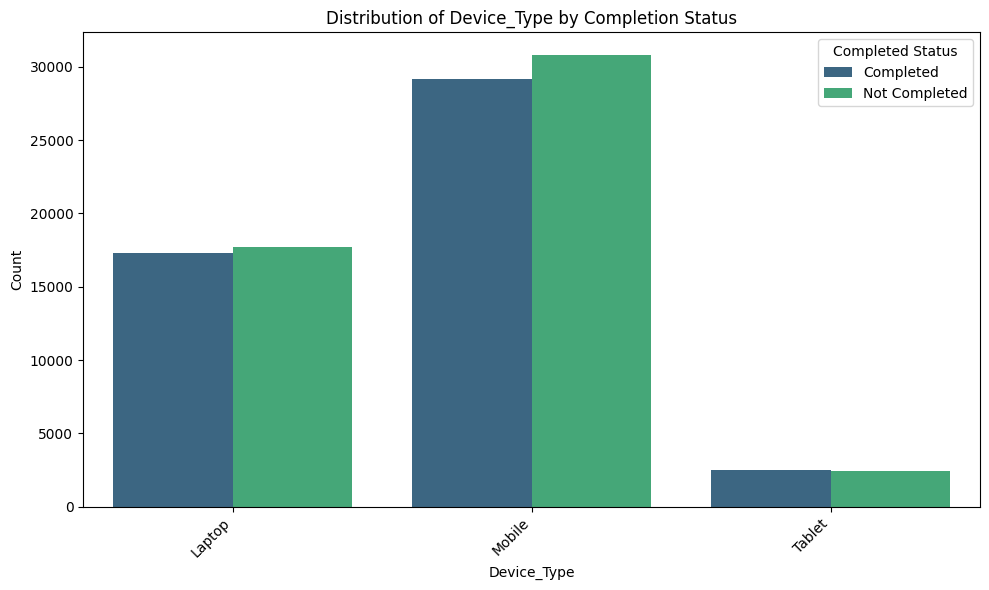

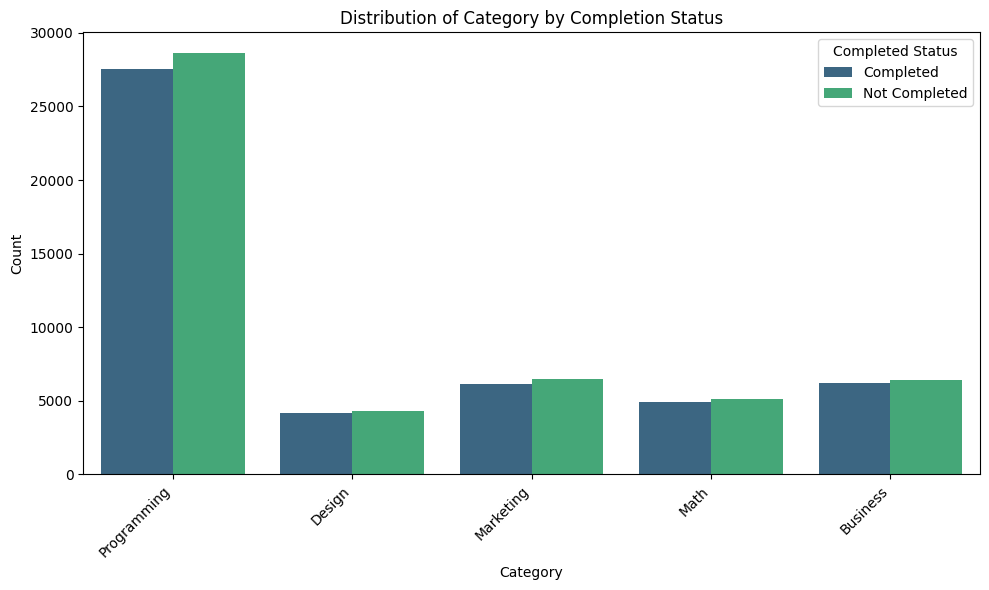

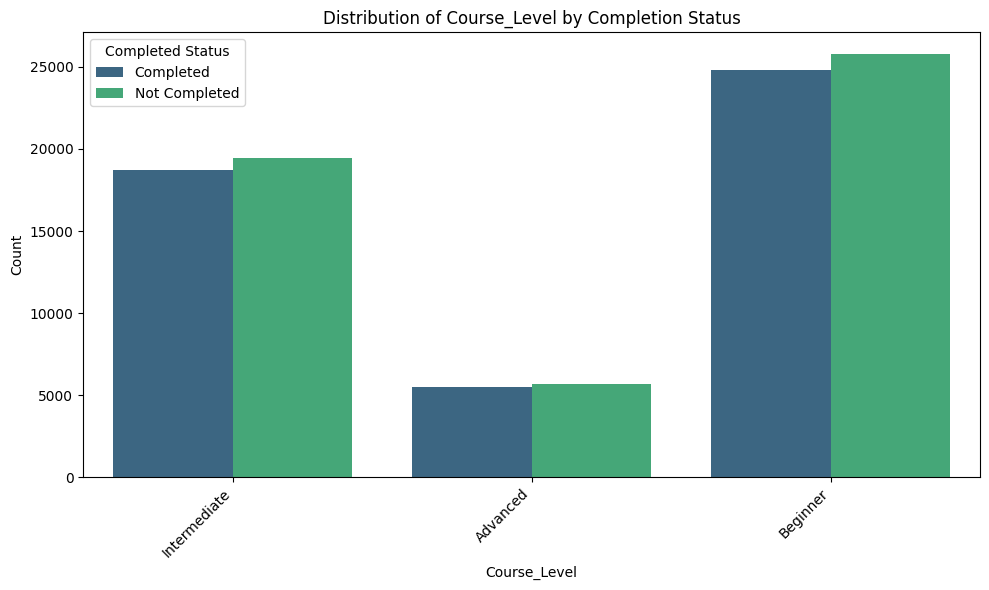

In [12]:
categorical_features = ['Gender', 'Education_Level', 'Device_Type', 'Category', 'Course_Level']

for feature in categorical_features:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df, x=feature, hue='Completed', palette='viridis')
    plt.title(f'Distribution of {feature} by Completion Status')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right')
    plt.legend(title='Completed Status')
    plt.tight_layout()
    plt.show()

## Explore Key Numerical Features vs. Target

### Subtask:
Select key numerical features like 'Login_Frequency', 'Average_Session_Duration_Min', 'Video_Completion_Rate', 'Quiz_Score_Avg', 'Satisfaction_Rating', and 'Progress_Percentage'. Create box plots or violin plots for each of these features against the 'Completed' variable to observe differences between the 'Completed' and 'Not Completed' groups. Ensure plots include legends.


**Reasoning**:
To visualize the distribution of the specified numerical features against the 'Completed' status, I will create a list of these features and then iterate through them. For each feature, I will generate a box plot using seaborn, setting 'Completed' on the x-axis and the numerical feature on the y-axis, and ensuring appropriate titles, labels, and legends are included as per the instructions.



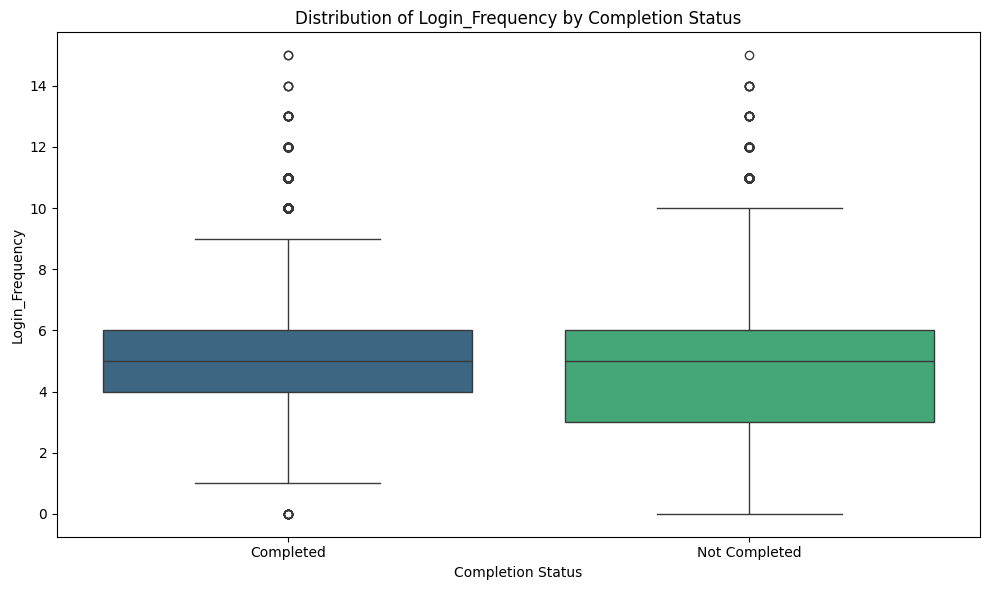

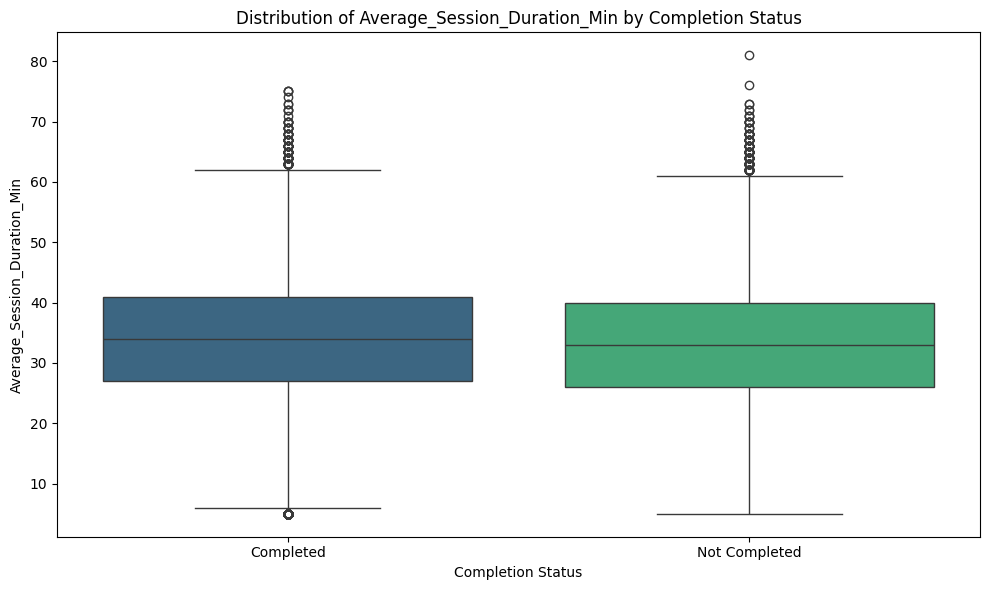

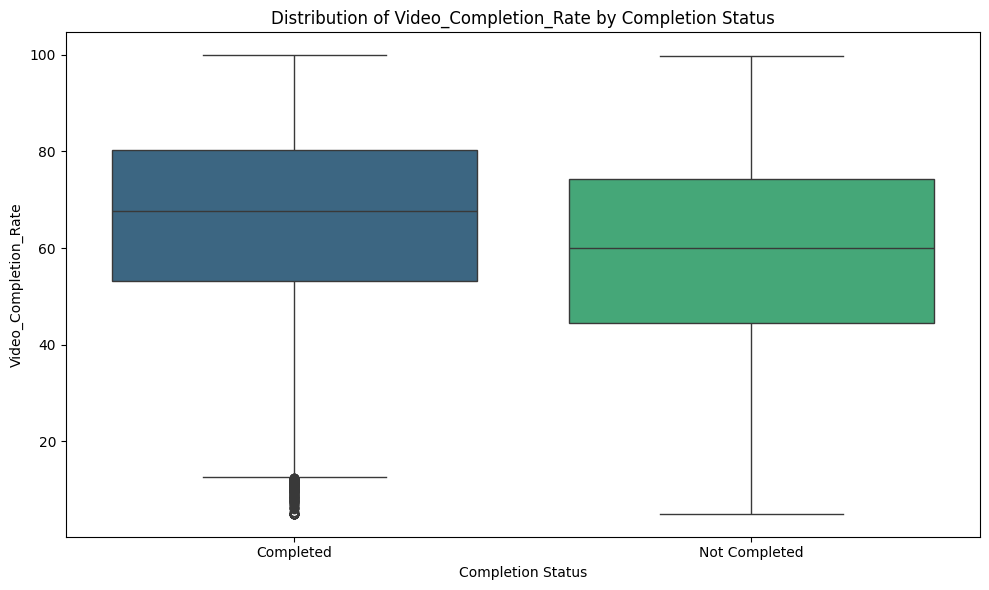

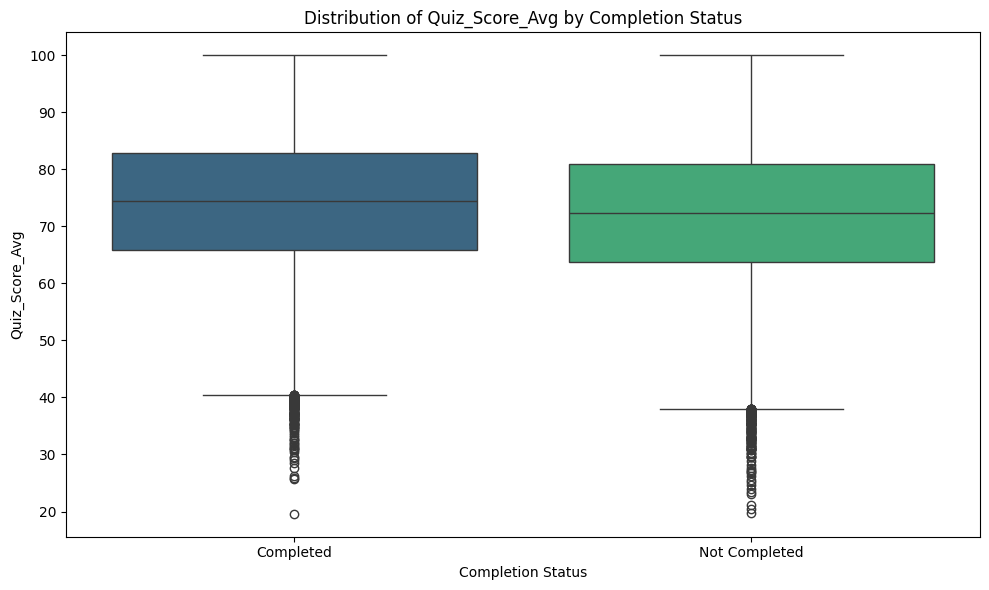

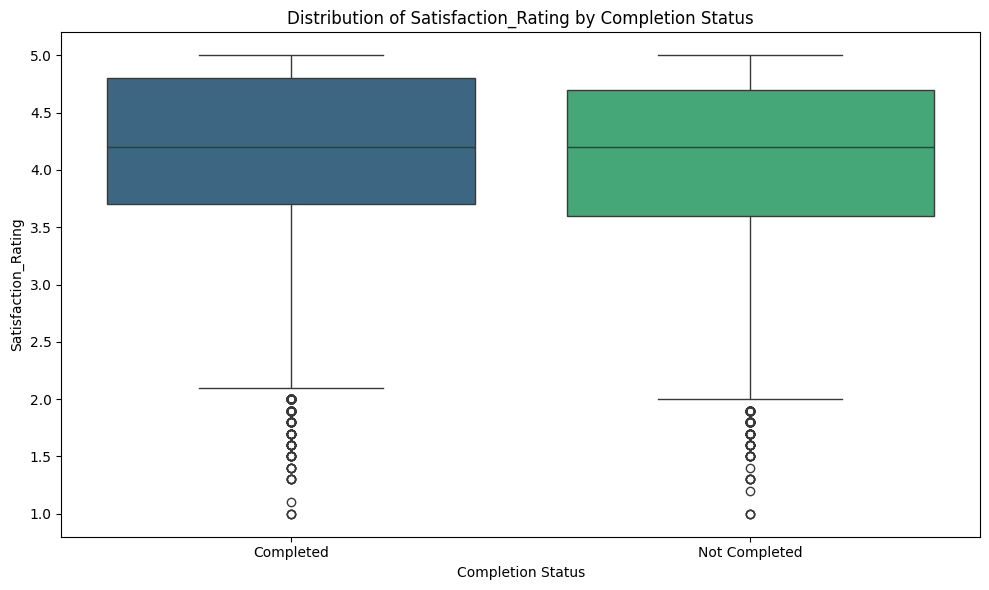

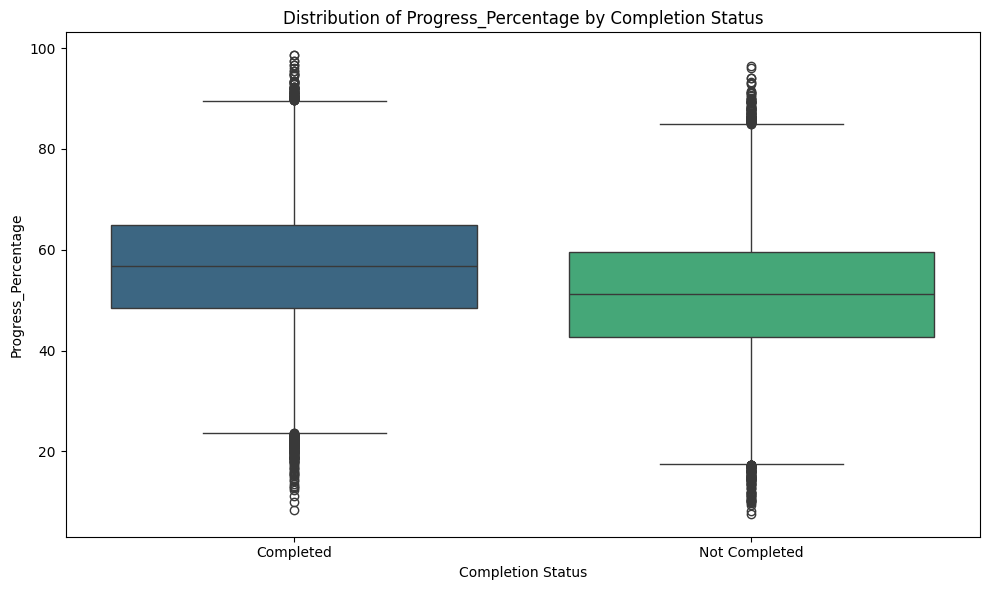

In [13]:
numerical_features = ['Login_Frequency', 'Average_Session_Duration_Min', 'Video_Completion_Rate', 'Quiz_Score_Avg', 'Satisfaction_Rating', 'Progress_Percentage']

for feature in numerical_features:
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=df, x='Completed', y=feature, hue='Completed', palette='viridis', legend=False)
    plt.title(f'Distribution of {feature} by Completion Status')
    plt.xlabel('Completion Status')
    plt.ylabel(feature)
    plt.tight_layout()
    plt.show()

## Correlation of Numerical Features with Target

### Subtask:
First, encode the 'Completed' column into numerical format (e.g., 0 for 'Not Completed' and 1 for 'Completed'). Then, calculate the correlation of all numerical features with this encoded target variable. Visualize these correlations, perhaps using a bar plot, to highlight the most influential numerical features. Ensure plots include legends.


**Reasoning**:
First, I will encode the 'Completed' column into a numerical format, creating a new column 'Completed_numeric'. This is a necessary step before calculating correlations with other numerical features.



In [14]:
df['Completed_numeric'] = df['Completed'].map({'Not Completed': 0, 'Completed': 1})
print("Encoded 'Completed' column to 'Completed_numeric'.")

Encoded 'Completed' column to 'Completed_numeric'.


**Reasoning**:
Now that the 'Completed' column is encoded numerically, I will calculate the correlation between all numerical features in the DataFrame and the 'Completed_numeric' column. Then, I will create a bar plot to visualize these correlations, highlighting which numerical features are most strongly related to course completion.



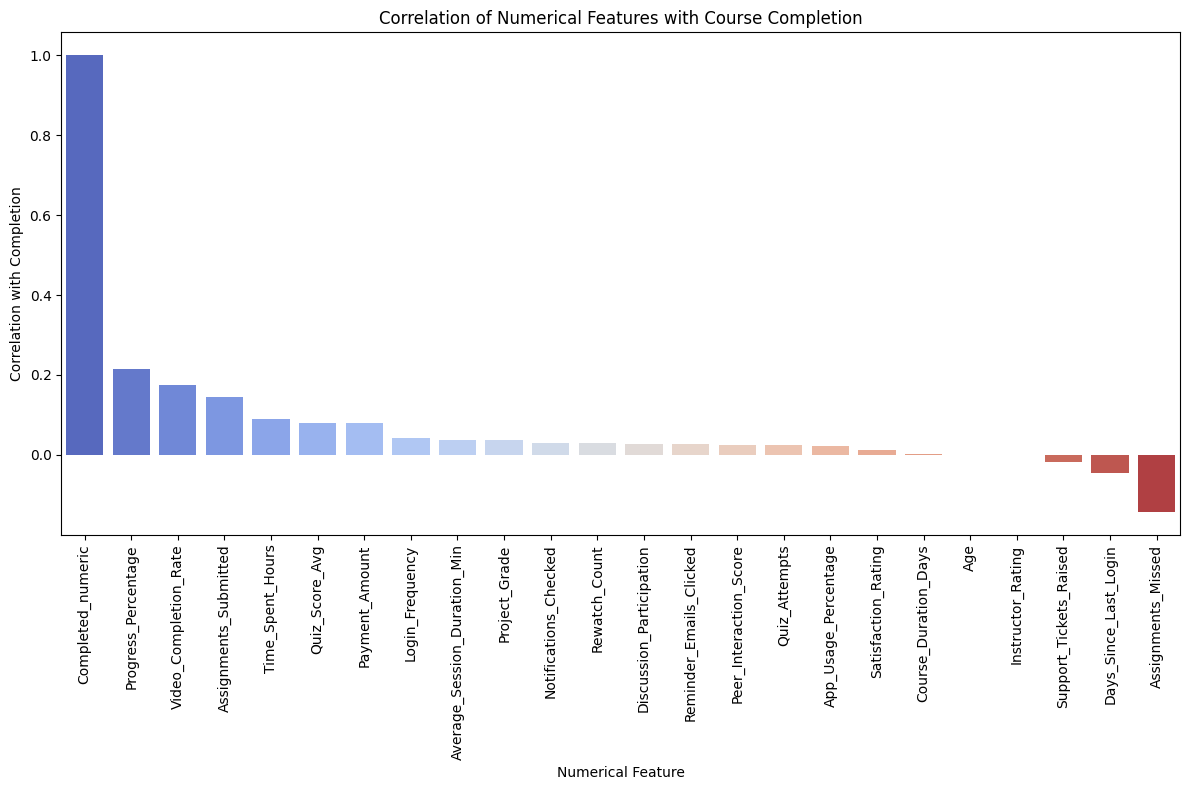

In [15]:
correlation_with_completion = df.select_dtypes(include=['int64', 'float64']).corrwith(df['Completed_numeric']).sort_values(ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x=correlation_with_completion.index, y=correlation_with_completion.values, hue=correlation_with_completion.index, palette='coolwarm', legend=False)
plt.title('Correlation of Numerical Features with Course Completion')
plt.xlabel('Numerical Feature')
plt.ylabel('Correlation with Completion')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Pre-processing
1) Remove irrelevant data
2) Feature engineering
3) Perform One-Hot encoding on categorical variables (with drop first enabled)
4) Remove low variance and low correlation data
5) Separate target variable from feature matrix
6) Train-test split
7) Scale & Normalize data

In [16]:
# Remove irrelevant data

In [17]:
pd.set_option('display.max_columns', None)
df.head()

,Student_ID,Name,Gender,Age,Education_Level,Employment_Status,City,Device_Type,Internet_Connection_Quality,Course_ID,Course_Name,Category,Course_Level,Course_Duration_Days,Instructor_Rating,Login_Frequency,Average_Session_Duration_Min,Video_Completion_Rate,Discussion_Participation,Time_Spent_Hours,Days_Since_Last_Login,Notifications_Checked,Peer_Interaction_Score,Assignments_Submitted,Assignments_Missed,Quiz_Attempts,Quiz_Score_Avg,Project_Grade,Progress_Percentage,Rewatch_Count,Enrollment_Date,Payment_Mode,Fee_Paid,Discount_Used,Payment_Amount,App_Usage_Percentage,Reminder_Emails_Clicked,Support_Tickets_Raised,Satisfaction_Rating,Completed,Completed_numeric
0,STU100000,Vihaan Patel,Male,19,Diploma,Student,Indore,Laptop,Medium,C102,Data Analysis with Python,Programming,Intermediate,60,4.7,3,30,55.0,2,0.5,1,6,4.3,8,1,5,80.9,71.2,70.8,0,01-06-2024,Scholarship,No,No,1740,49,3,4,3.5,Completed,1
1,STU100001,Arjun Nair,Female,17,Bachelor,Student,Delhi,Laptop,Low,C106,Machine Learning A-Z,Programming,Advanced,90,4.6,4,37,84.1,2,0.9,3,5,7.8,4,6,3,78.4,42.5,55.6,2,27-04-2025,Credit Card,Yes,No,6147,86,0,0,4.5,Not Completed,0
2,STU100002,Aditya Bhardwaj,Female,34,Master,Student,Chennai,Mobile,Medium,C101,Python Basics,Programming,Beginner,45,4.6,5,9,75.6,3,0.5,19,5,6.7,8,2,3,100.0,87.9,78.8,2,20-01-2024,NetBanking,Yes,No,4280,85,1,0,5.0,Completed,1
3,STU100003,Krishna Singh,Female,29,Diploma,Employed,Surat,Mobile,High,C105,UI/UX Design Fundamentals,Design,Beginner,40,4.4,2,27,63.3,1,7.4,19,9,6.4,0,10,4,59.1,51.4,24.7,4,13-05-2025,UPI,Yes,No,3812,42,2,3,3.8,Completed,1
4,STU100004,Krishna Nair,Female,19,Master,Self-Employed,Lucknow,Laptop,Medium,C106,Machine Learning A-Z,Programming,Advanced,90,4.6,2,36,86.4,1,0.5,4,7,7.5,5,5,8,84.8,93.0,64.9,4,19-12-2024,Debit Card,Yes,Yes,5486,91,3,0,4.0,Completed,1


In [18]:
#Find irrelevant data
categorical_cols = df.select_dtypes(include=['object', 'category']).columns

for col in categorical_cols:
    print(f"\n--- Value Counts for '{col}' ---")
    print(df[col].value_counts())

# Remove studentID, Name, Enrollment date
df = df.drop(["Student_ID", "Name", "Enrollment_Date"], axis=1)


--- Value Counts for 'Student_ID' ---
Student_ID
STU199983    1
STU199982    1
STU199981    1
STU199980    1
STU199979    1
            ..
STU100004    1
STU100003    1
STU100002    1
STU100001    1
STU100000    1
Name: count, Length: 100000, dtype: int64

--- Value Counts for 'Name' ---
Name
Ritika Iyer      398
Arjun Joshi      387
Sakshi Iyer      384
Ritika Reddy     381
Sneha Patel      375
                ... 
Ritika Singh     300
Aarav Desai      299
Aarav Bose       297
Krishna Mehta    295
Sai Verma        280
Name: count, Length: 300, dtype: int64

--- Value Counts for 'Gender' ---
Gender
Female    50187
Male      47819
Other      1994
Name: count, dtype: int64

--- Value Counts for 'Education_Level' ---
Education_Level
Bachelor      54956
Master        21859
HighSchool    10107
Diploma       10032
PhD            3046
Name: count, dtype: int64

--- Value Counts for 'Employment_Status' ---
Employment_Status
Employed         45091
Student          44929
Self-Employed     5067


In [ ]:
df.head()

In [ ]:
# Feature engineering

# BINNING of days since last login -- simplify representation
df['Days_Since_Last_Login'].describe()

df["Login_Recency_Bin"] = pd.cut(
    df["Days_Since_Last_Login"],
    bins=[0, 3, 7, 1000],
    labels=["recent", "medium_gap", "long_gap"]
)

df.head()

In [ ]:
# Assignment completion percentage -- Get flat percentage at how much assigments the student completed in a class -- combines 2 variables
df["Assignment_Completion_Percent"] = (
    df["Assignments_Submitted"] / (df["Assignments_Submitted"] + df["Assignments_Missed"] + 1)
)
df.head()

In [ ]:
# Engagement Score (domain-driven) -- combine variables that represent overall class participation
df["Engagement_Score"] = (
    0.4 * df["Video_Completion_Rate"] +
    0.4 * df["Assignment_Completion_Percent"] +
    0.2 * df["Login_Frequency"]
)
df.head()

In [ ]:
# Performance × Activity interaction -- how well did the student do in the class
df["Performance_Activity"] = df["Quiz_Score_Avg"] * df["Assignments_Submitted"]
df.head()

In [ ]:
# Binary flags -- flags represent student's overall engagement with the class
df["Low_Engagement_Flag"] = (df["Video_Completion_Rate"] < 0.4).astype(int)
df["Inactive_Week_Flag"] = (df["Days_Since_Last_Login"] > 7).astype(int)
df.head()

In [25]:
# One-Hot encoding on categorical variables

In [ ]:
categorical_cols_to_encode = df.select_dtypes(include=['object', 'category']).columns.tolist()
df.drop(["Completed"], axis=1)

print(f"Categorical columns to encode: {categorical_cols_to_encode}")

df = pd.get_dummies(df, columns=categorical_cols_to_encode, drop_first=True)
print("One-hot encoding complete.")
df.head()

In [ ]:
df = df.drop(["Completed_Not Completed"], axis=1)
df.head()

In [ ]:
df.head()

In [ ]:
# Remove variables with exceptionally low variance and low correlation with completion rate
pd.set_option('display.max_rows', None)
df.var()
# Instructor rating, assignment completion percent have very low variance

In [30]:
# Generate correlation chart including newly engineered features

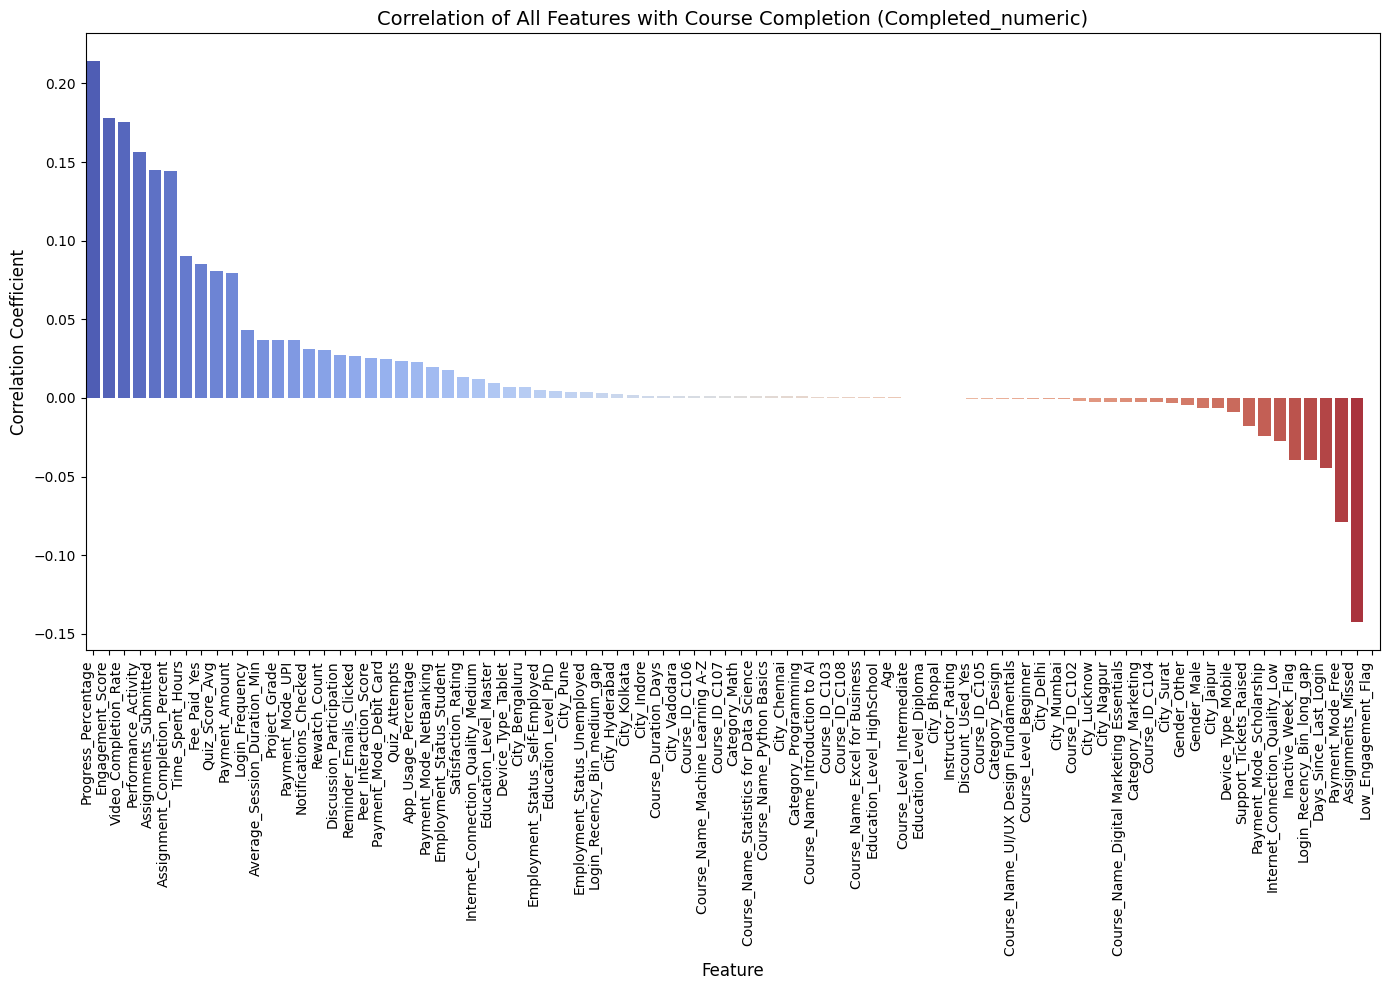

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate correlation of all columns with 'Completed_numeric'
correlation_with_target = df.corr(numeric_only=True)['Completed_numeric'].sort_values(ascending=False)

# Drop the correlation of 'Completed_numeric' with itself
correlation_with_target = correlation_with_target.drop('Completed_numeric')

plt.figure(figsize=(14, 10))  # Adjust figure size for better visibility of many features
sns.barplot(x=correlation_with_target.index, y=correlation_with_target.values, hue=correlation_with_target.index, palette='coolwarm', legend=False)
plt.title('Correlation of All Features with Course Completion (Completed_numeric)', fontsize=14)
plt.xlabel('Feature', fontsize=12)
plt.ylabel('Correlation Coefficient', fontsize=12)
plt.xticks(rotation=90, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

In [ ]:
# The above correlation barchart is hard to discern valuable information from, it is clear instructor rating is an irrelevant variable to include in the models
# Discount_Used, Instructor_Rating, City_Bhopal, Education_Level_Diploma, Course_Level_Intermediate, and Age have a low enough correlation to remove from this dataframe
# Assignment completion rate has an extremely high correlation but very low variance. So we will keep it in the model

df = df.drop(["Discount_Used_Yes", "Instructor_Rating", "City_Bhopal", "Education_Level_Diploma", "Course_Level_Intermediate", "Age"], axis=1)
df.head()

In [ ]:
# Separate target variable and dataframe
y = df["Completed_numeric"]
X = df.drop(["Completed_numeric"], axis=1)
y.head()

In [ ]:
df.head()

In [35]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of y_test: {y_test.shape}")

Shape of X_train: (80000, 78)
Shape of X_test: (20000, 78)
Shape of y_train: (80000,)
Shape of y_test: (20000,)


In [36]:
# Scale and normalize data

In [41]:
from sklearn.preprocessing import StandardScaler

# Identify numerical columns in X_train (excluding one-hot encoded and binary flags)
numerical_cols = X_train.select_dtypes(include=['int64', 'float64']).columns

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler on the numerical columns of the training data
X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])

# Transform the numerical columns of both training and testing data
X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])

print("Numerical features in X_train and X_test have been scaled.")

display(X_train.shape)

Numerical features in X_train and X_test have been scaled.


(80000, 78)

# Model Training & Validation
The models will be tested on accuracy, precision, recall, and F1 score. However, recall will be the most prioritized metric because in this model, false negatives can be much more damaging than false positives.
<br> If a student is predicted to fail the course, corrective measures can be assigned that can potentially help him pass the class. It would be very inefficient if the model failed to forecast the failure of students and prevent them from getting the help they need (false negative) as opposed to successful students being falsely detected as failing (false positive).

## Conclusion
This model will prioritize recall to minimize false negatives.

In [38]:
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import GradientBoostingClassifier

# Task
Train and evaluate Logistic Regression, Random Forest, and Gradient Boosting Classifier models on the preprocessed training and testing data (X_train, y_train, X_test, y_test). For each model, calculate and report the accuracy, precision, recall, and F1 score. Finally, summarize and compare the performance of all three models, highlighting the recall values to determine the best-performing model for predicting course completion.

## Train and Evaluate Logistic Regression Model

### Subtask:
Initialize and train a Logistic Regression model on the training data (X_train, y_train). Then, make predictions on the test data (X_test) and calculate the accuracy, precision, recall, and F1 score of the model.


**Reasoning**:
I will initialize and train a Logistic Regression model, make predictions on the test data, and then calculate and print the accuracy, precision, recall, and F1 score as per the instructions.



In [39]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# 1. Initialize a LogisticRegression model
log_reg_model = LogisticRegression(random_state=42, solver='liblinear', max_iter=1000) # Added solver and max_iter for convergence

# 2. Train the Logistic Regression model
log_reg_model.fit(X_train, y_train)

# 3. Make predictions on the X_test data
y_pred_log_reg = log_reg_model.predict(X_test)

# 4. Calculate the evaluation metrics
accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)
precision_log_reg = precision_score(y_test, y_pred_log_reg)
recall_log_reg = recall_score(y_test, y_pred_log_reg)
f1_log_reg = f1_score(y_test, y_pred_log_reg)

# 5. Print the calculated metrics
print(f"Logistic Regression Accuracy: {accuracy_log_reg:.4f}")
print(f"Logistic Regression Precision: {precision_log_reg:.4f}")
print(f"Logistic Regression Recall: {recall_log_reg:.4f}")
print(f"Logistic Regression F1-Score: {f1_log_reg:.4f}")

Logistic Regression Accuracy: 0.6046
Logistic Regression Precision: 0.5988
Logistic Regression Recall: 0.5866
Logistic Regression F1-Score: 0.5926


## Train and Evaluate Random Forest Model

### Subtask:
Initialize and train a Random Forest Classifier model on the training data (`X_train`, `y_train`). Then, make predictions on the test data (`X_test`) and calculate the accuracy, precision, recall, and F1 score of the model.

## Train and Evaluate Random Forest Model

### Subtask:
Initialize and train a Random Forest Classifier model on the training data (`X_train`, `y_train`). Then, make predictions on the test data (`X_test`) and calculate the accuracy, precision, recall, and F1 score of the model.

#### Instructions
1. Initialize a `RandomForestClassifier` model. Set `random_state=42` for reproducibility.
2. Train the Random Forest model using the `fit` method with `X_train` and `y_train`.
3. Make predictions on the `X_test` data using the trained model's `predict` method.
4. Calculate the accuracy, precision, recall, and F1 score of the model using `y_test` and the predictions.
5. Print the calculated accuracy, precision, recall, and F1 score.

**Reasoning**:
Now that the instructions for the Random Forest model are laid out, I will implement the Python code to initialize, train, predict, and evaluate the RandomForestClassifier as specified.



In [42]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# 1. Initialize a RandomForestClassifier model
rf_model = RandomForestClassifier(random_state=42)

# 2. Train the Random Forest model
rf_model.fit(X_train, y_train)

# 3. Make predictions on the X_test data
y_pred_rf = rf_model.predict(X_test)

# 4. Calculate the evaluation metrics
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)

# 5. Print the calculated metrics
print(f"Random Forest Accuracy: {accuracy_rf:.4f}")
print(f"Random Forest Precision: {precision_rf:.4f}")
print(f"Random Forest Recall: {recall_rf:.4f}")
print(f"Random Forest F1-Score: {f1_rf:.4f}")

Random Forest Accuracy: 0.5936
Random Forest Precision: 0.5897
Random Forest Recall: 0.5627
Random Forest F1-Score: 0.5759


## Train and Evaluate Gradient Boosting Classifier Model

### Subtask:
Initialize and train a Gradient Boosting Classifier model on the training data (`X_train`, `y_train`). Then, make predictions on the test data (`X_test`) and calculate the accuracy, precision, recall, and F1 score of the model.

#### Instructions
1. Initialize a `GradientBoostingClassifier` model. Set `random_state=42` for reproducibility.
2. Train the Gradient Boosting Classifier model using the `fit` method with `X_train` and `y_train`.
3. Make predictions on the `X_test` data using the trained model's `predict` method.
4. Calculate the accuracy, precision, recall, and F1 score of the model using `y_test` and the predictions.
5. Print the calculated accuracy, precision, recall, and F1 score.

**Reasoning**:
Now that the instructions for the Gradient Boosting Classifier model are laid out, I will implement the Python code to initialize, train, predict, and evaluate the GradientBoostingClassifier as specified.



In [43]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# 1. Initialize a GradientBoostingClassifier model
gbc_model = GradientBoostingClassifier(random_state=42)

# 2. Train the Gradient Boosting Classifier model
gbc_model.fit(X_train, y_train)

# 3. Make predictions on the X_test data
y_pred_gbc = gbc_model.predict(X_test)

# 4. Calculate the evaluation metrics
accuracy_gbc = accuracy_score(y_test, y_pred_gbc)
precision_gbc = precision_score(y_test, y_pred_gbc)
recall_gbc = recall_score(y_test, y_pred_gbc)
f1_gbc = f1_score(y_test, y_pred_gbc)

# 5. Print the calculated metrics
print(f"Gradient Boosting Classifier Accuracy: {accuracy_gbc:.4f}")
print(f"Gradient Boosting Classifier Precision: {precision_gbc:.4f}")
print(f"Gradient Boosting Classifier Recall: {recall_gbc:.4f}")
print(f"Gradient Boosting Classifier F1-Score: {f1_gbc:.4f}")

Gradient Boosting Classifier Accuracy: 0.6025
Gradient Boosting Classifier Precision: 0.5962
Gradient Boosting Classifier Recall: 0.5864
Gradient Boosting Classifier F1-Score: 0.5913


# Initial testing results
Out of the three models, Logistic Regression and Gradient Boosting had the best recall, both outperforming Random Forest. However, these models fall short in overall accuracy, not significantly exceeding 60% across the board.
<br>
<br>
Therefore, we must tune hyperparameters of these models to make them better fit the data.

In [ ]:
# Tuning Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

log_reg = LogisticRegression(
    solver='liblinear',
    max_iter=1000,
    random_state=42
)

# These hyperparameters will be cross-validated
param_grid = {
    'C': [0.01, 0.1, 1, 5, 10],
    'penalty': ['l1', 'l2'],
    'class_weight': ['balanced']
}


grid_search = GridSearchCV(
    estimator=log_reg,
    param_grid=param_grid,
    scoring='recall',
    cv=5,
    n_jobs=-1
)

grid_search.fit(X_train, y_train)

best_log_reg = grid_search.best_estimator_

print("Best parameters:", grid_search.best_params_)

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

y_pred_tuned = best_log_reg.predict(X_test)

print("Tuned Logistic Regression")
print("Accuracy:", accuracy_score(y_test, y_pred_tuned))
print("Precision:", precision_score(y_test, y_pred_tuned))
print("Recall:", recall_score(y_test, y_pred_tuned))
print("F1:", f1_score(y_test, y_pred_tuned))

In [ ]:
# Tuning Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

rf = RandomForestClassifier(
    random_state=42,
    n_jobs=-1
)

param_grid = {
    'n_estimators': [100, 300],
    'max_depth': [5, 10, 15],
    'min_samples_leaf': [1, 5, 10],
    'max_features': ['sqrt', 'log2'],
    'class_weight': ['balanced']
}

grid_search_rf = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    scoring='recall',
    cv=5,
    n_jobs=-1,
    verbose=1
)

# Ensure this fit method completes successfully for best_estimator_ and best_params_ to be available
grid_search_rf.fit(X_train, y_train)

best_rf = grid_search_rf.best_estimator_

print("Best RF parameters:", grid_search_rf.best_params_)

y_pred_tuned_rf = best_rf.predict(X_test)

print("\nTuned Random Forest")
print("Accuracy:", accuracy_score(y_test, y_pred_tuned_rf))
print("Precision:", precision_score(y_test, y_pred_tuned_rf))
print("Recall:", recall_score(y_test, y_pred_tuned_rf))
print("F1:", f1_score(y_test, y_pred_tuned_rf))


#Result: Post hyperparameter tuning
Models did not perform significantly better after hyperparameter tuning. My next steps will be to investigate how these models performed in more detail to see if there is a possible solution.

# Task
Generate and visualize the confusion matrix for the Logistic Regression model using `y_test` and `y_pred_log_reg` by creating a heatmap with clear labels, a title, and annotations.

## Generate and Visualize Confusion Matrix for Logistic Regression

### Subtask:
Calculate the confusion matrix for the Logistic Regression model using `y_test` and `y_pred_log_reg`. Then, visualize this confusion matrix using a heatmap, ensuring clear labels, title, and annotations.


**Reasoning**:
I will import the necessary libraries, calculate the confusion matrix using `y_test` and `y_pred_log_reg`, and then visualize it as a heatmap with annotations, labels, and a title as per the instructions.



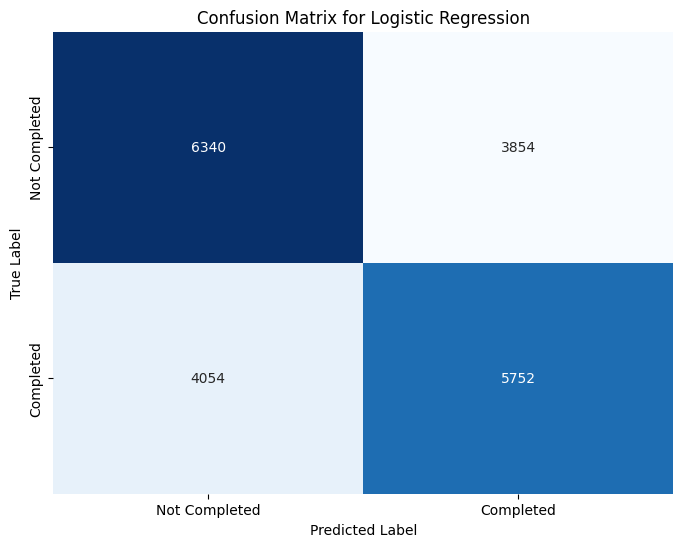

In [45]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Calculate the confusion matrix
cm_log_reg = confusion_matrix(y_test, y_pred_log_reg)

# 2. Visualize the confusion matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm_log_reg, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Not Completed', 'Completed'],
            yticklabels=['Not Completed', 'Completed'])
plt.title('Confusion Matrix for Logistic Regression')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

## Generate and Visualize Confusion Matrix for Random Forest

### Subtask:
Calculate the confusion matrix for the Random Forest model using `y_test` and `y_pred_rf`. Then, visualize this confusion matrix using a heatmap, ensuring clear labels, title, and annotations.


**Reasoning**:
To fulfill the subtask, I will calculate the confusion matrix for the Random Forest model and then visualize it using a seaborn heatmap with the specified labels, title, and annotations.



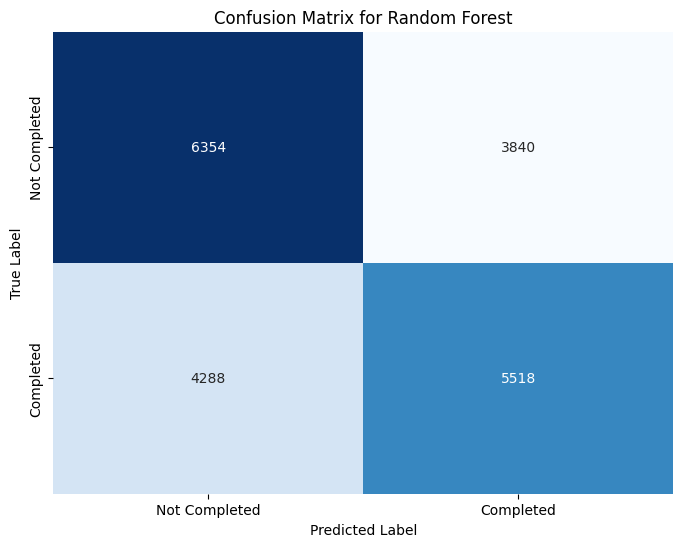

In [46]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Calculate the confusion matrix for the Random Forest model
cm_rf = confusion_matrix(y_test, y_pred_rf)

# 2. Visualize the confusion matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Not Completed', 'Completed'],
            yticklabels=['Not Completed', 'Completed'])
plt.title('Confusion Matrix for Random Forest')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

**Reasoning**:
To complete the subtask, I will calculate the confusion matrix for the Gradient Boosting Classifier model using `y_test` and `y_pred_gbc`, and then visualize it as a heatmap with clear labels, a title, and annotations, following the same approach used for the previous models.



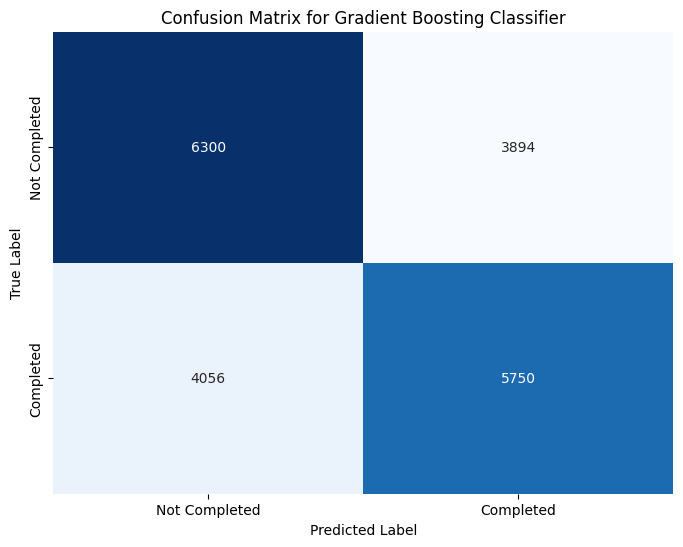

In [47]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Calculate the confusion matrix for the Gradient Boosting Classifier model
cm_gbc = confusion_matrix(y_test, y_pred_gbc)

# 2. Visualize the confusion matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm_gbc, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Not Completed', 'Completed'],
            yticklabels=['Not Completed', 'Completed'])
plt.title('Confusion Matrix for Gradient Boosting Classifier')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Threshold tuning
In an attempt to decrease false negatives, I will experiment with threshold tuning to further minimize error

# Task
Perform threshold tuning for Logistic Regression, Random Forest, and Gradient Boosting Classifier models by iterating classification thresholds from 0.1 to 0.9 to maximize recall. For each model, report the best threshold and corresponding accuracy, precision, recall, and F1-score. Finally, summarize and compare the threshold tuning results across all three models, highlighting recall improvements and trade-offs, to determine which model performs best in maximizing recall.

## Threshold Tuning for Logistic Regression

### Subtask:
Obtain probability predictions from the Logistic Regression model on the test data. Iterate through a range of classification thresholds (e.g., from 0.1 to 0.9), calculate the recall score for each threshold, and identify the threshold that maximizes recall. Report the best threshold and the corresponding accuracy, precision, recall, and F1-score.


**Reasoning**:
I will obtain probability predictions from the Logistic Regression model, then iterate through a range of thresholds to find the one that maximizes recall, and finally report the best threshold along with its corresponding evaluation metrics.



In [48]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np

# 1. Obtain probability predictions for the positive class
probabilities = log_reg_model.predict_proba(X_test)[:, 1]

# 2. Initialize variables for best metrics
best_recall = 0
best_threshold = 0
best_accuracy = 0
best_precision = 0
best_f1 = 0

# 3. Create a loop for thresholds from 0.1 to 0.9
thresholds = np.arange(0.1, 1.0, 0.1)

print("Threshold Tuning for Logistic Regression (Maximizing Recall):\n")

for threshold in thresholds:
    # 4. Convert probabilities to binary predictions based on the current threshold
    y_pred_threshold = (probabilities >= threshold).astype(int)

    # 5. Calculate metrics for the current threshold
    current_accuracy = accuracy_score(y_test, y_pred_threshold)
    current_precision = precision_score(y_test, y_pred_threshold, zero_division=0)
    current_recall = recall_score(y_test, y_pred_threshold)
    current_f1 = f1_score(y_test, y_pred_threshold)

    # 6. Compare with best recall found so far
    if current_recall > best_recall:
        best_recall = current_recall
        best_threshold = threshold
        best_accuracy = current_accuracy
        best_precision = current_precision
        best_f1 = current_f1

    print(f"Threshold: {threshold:.1f} | Accuracy: {current_accuracy:.4f} | Precision: {current_precision:.4f} | Recall: {current_recall:.4f} | F1-Score: {current_f1:.4f}")

# 7. Print the best results
print(f"\nBest Threshold for Logistic Regression: {best_threshold:.1f}")
print(f"Corresponding Accuracy: {best_accuracy:.4f}")
print(f"Corresponding Precision: {best_precision:.4f}")
print(f"Corresponding Recall: {best_recall:.4f}")
print(f"Corresponding F1-Score: {best_f1:.4f}")

Threshold Tuning for Logistic Regression (Maximizing Recall):

Threshold: 0.1 | Accuracy: 0.4903 | Precision: 0.4903 | Recall: 1.0000 | F1-Score: 0.6580
Threshold: 0.2 | Accuracy: 0.4974 | Precision: 0.4938 | Recall: 0.9960 | F1-Score: 0.6602
Threshold: 0.3 | Accuracy: 0.5304 | Precision: 0.5112 | Recall: 0.9593 | F1-Score: 0.6670
Threshold: 0.4 | Accuracy: 0.5832 | Precision: 0.5493 | Recall: 0.8347 | F1-Score: 0.6626
Threshold: 0.5 | Accuracy: 0.6046 | Precision: 0.5988 | Recall: 0.5866 | F1-Score: 0.5926
Threshold: 0.6 | Accuracy: 0.5807 | Precision: 0.6637 | Recall: 0.2937 | F1-Score: 0.4072
Threshold: 0.7 | Accuracy: 0.5340 | Precision: 0.7341 | Recall: 0.0777 | F1-Score: 0.1405
Threshold: 0.8 | Accuracy: 0.5112 | Precision: 0.7460 | Recall: 0.0048 | F1-Score: 0.0095
Threshold: 0.9 | Accuracy: 0.5097 | Precision: 0.0000 | Recall: 0.0000 | F1-Score: 0.0000

Best Threshold for Logistic Regression: 0.1
Corresponding Accuracy: 0.4903
Corresponding Precision: 0.4903
Corresponding Recal

## Threshold Tuning for Random Forest

### Subtask:
Obtain probability predictions from the Random Forest model on the test data. Iterate through a range of classification thresholds (e.g., from 0.1 to 0.9), calculate the recall score for each threshold, and identify the threshold that maximizes recall. Report the best threshold and the corresponding accuracy, precision, recall, and F1-score.

**Reasoning**:
I will obtain probability predictions from the Random Forest model, then iterate through a range of thresholds to find the one that maximizes recall, and finally report the best threshold along with its corresponding evaluation metrics, following the pattern of the previous step.



In [49]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np

# 1. Obtain probability predictions for the positive class
probabilities_rf = rf_model.predict_proba(X_test)[:, 1]

# 2. Initialize variables for best metrics
best_recall_rf = 0
best_threshold_rf = 0
best_accuracy_rf = 0
best_precision_rf = 0
best_f1_rf = 0

# 3. Create a loop for thresholds from 0.1 to 0.9
thresholds_rf = np.arange(0.1, 1.0, 0.1)

print("Threshold Tuning for Random Forest (Maximizing Recall):\n")

for threshold in thresholds_rf:
    # 4. Convert probabilities to binary predictions based on the current threshold
    y_pred_threshold_rf = (probabilities_rf >= threshold).astype(int)

    # 5. Calculate metrics for the current threshold
    current_accuracy_rf = accuracy_score(y_test, y_pred_threshold_rf)
    current_precision_rf = precision_score(y_test, y_pred_threshold_rf, zero_division=0)
    current_recall_rf = recall_score(y_test, y_pred_threshold_rf)
    current_f1_rf = f1_score(y_test, y_pred_threshold_rf)

    # 6. Compare with best recall found so far
    if current_recall_rf > best_recall_rf:
        best_recall_rf = current_recall_rf
        best_threshold_rf = threshold
        best_accuracy_rf = current_accuracy_rf
        best_precision_rf = current_precision_rf
        best_f1_rf = current_f1_rf

    print(f"Threshold: {threshold:.1f} | Accuracy: {current_accuracy_rf:.4f} | Precision: {current_precision_rf:.4f} | Recall: {current_recall_rf:.4f} | F1-Score: {current_f1_rf:.4f}")

# 7. Print the best results
print(f"\nBest Threshold for Random Forest: {best_threshold_rf:.1f}")
print(f"Corresponding Accuracy: {best_accuracy_rf:.4f}")
print(f"Corresponding Precision: {best_precision_rf:.4f}")
print(f"Corresponding Recall: {best_recall_rf:.4f}")
print(f"Corresponding F1-Score: {best_f1_rf:.4f}")

Threshold Tuning for Random Forest (Maximizing Recall):

Threshold: 0.1 | Accuracy: 0.4907 | Precision: 0.4905 | Recall: 0.9998 | F1-Score: 0.6581
Threshold: 0.2 | Accuracy: 0.4972 | Precision: 0.4937 | Recall: 0.9953 | F1-Score: 0.6600
Threshold: 0.3 | Accuracy: 0.5255 | Precision: 0.5086 | Recall: 0.9509 | F1-Score: 0.6628
Threshold: 0.4 | Accuracy: 0.5676 | Precision: 0.5377 | Recall: 0.8437 | F1-Score: 0.6568
Threshold: 0.5 | Accuracy: 0.5917 | Precision: 0.5825 | Recall: 0.5899 | F1-Score: 0.5862
Threshold: 0.6 | Accuracy: 0.5727 | Precision: 0.6413 | Recall: 0.2916 | F1-Score: 0.4009
Threshold: 0.7 | Accuracy: 0.5288 | Precision: 0.7099 | Recall: 0.0659 | F1-Score: 0.1206
Threshold: 0.8 | Accuracy: 0.5111 | Precision: 0.6667 | Recall: 0.0057 | F1-Score: 0.0113
Threshold: 0.9 | Accuracy: 0.5097 | Precision: 0.0000 | Recall: 0.0000 | F1-Score: 0.0000

Best Threshold for Random Forest: 0.1
Corresponding Accuracy: 0.4907
Corresponding Precision: 0.4905
Corresponding Recall: 0.9998
Co

## Threshold Tuning for Gradient Boosting Classifier

### Subtask:
Obtain probability predictions from the Gradient Boosting Classifier model on the test data. Iterate through a range of classification thresholds (e.g., from 0.1 to 0.9), calculate the recall score for each threshold, and identify the threshold that maximizes recall. Report the best threshold and the corresponding accuracy, precision, recall, and F1-score.

## Threshold Tuning for Gradient Boosting Classifier

### Subtask:
Obtain probability predictions from the Gradient Boosting Classifier model on the test data. Iterate through a range of classification thresholds (e.g., from 0.1 to 0.9), calculate the recall score for each threshold, and identify the threshold that maximizes recall. Report the best threshold and the corresponding accuracy, precision, recall, and F1-score.

**Reasoning**:
I will now implement the threshold tuning for the Gradient Boosting Classifier model by obtaining its probability predictions, iterating through various thresholds, calculating evaluation metrics for each, and identifying the best threshold that maximizes recall, similar to the previous models.



In [50]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np

# 1. Obtain probability predictions for the positive class
probabilities_gbc = gbc_model.predict_proba(X_test)[:, 1]

# 2. Initialize variables for best metrics
best_recall_gbc = 0
best_threshold_gbc = 0
best_accuracy_gbc = 0
best_precision_gbc = 0
best_f1_gbc = 0

# 3. Create a loop for thresholds from 0.1 to 0.9
thresholds_gbc = np.arange(0.1, 1.0, 0.1)

print("Threshold Tuning for Gradient Boosting Classifier (Maximizing Recall):\n")

for threshold in thresholds_gbc:
    # 4. Convert probabilities to binary predictions based on the current threshold
    y_pred_threshold_gbc = (probabilities_gbc >= threshold).astype(int)

    # 5. Calculate metrics for the current threshold
    current_accuracy_gbc = accuracy_score(y_test, y_pred_threshold_gbc)
    current_precision_gbc = precision_score(y_test, y_pred_threshold_gbc, zero_division=0)
    current_recall_gbc = recall_score(y_test, y_pred_threshold_gbc)
    current_f1_gbc = f1_score(y_test, y_pred_threshold_gbc)

    # 6. Compare with best recall found so far
    if current_recall_gbc > best_recall_gbc:
        best_recall_gbc = current_recall_gbc
        best_threshold_gbc = threshold
        best_accuracy_gbc = current_accuracy_gbc
        best_precision_gbc = current_precision_gbc
        best_f1_gbc = current_f1_gbc

    print(f"Threshold: {threshold:.1f} | Accuracy: {current_accuracy_gbc:.4f} | Precision: {current_precision_gbc:.4f} | Recall: {current_recall_gbc:.4f} | F1-Score: {current_f1_gbc:.4f}")

# 7. Print the best results
print(f"\nBest Threshold for Gradient Boosting Classifier: {best_threshold_gbc:.1f}")
print(f"Corresponding Accuracy: {best_accuracy_gbc:.4f}")
print(f"Corresponding Precision: {best_precision_gbc:.4f}")
print(f"Corresponding Recall: {best_recall_gbc:.4f}")
print(f"Corresponding F1-Score: {best_f1_gbc:.4f}")

Threshold Tuning for Gradient Boosting Classifier (Maximizing Recall):

Threshold: 0.1 | Accuracy: 0.4903 | Precision: 0.4903 | Recall: 1.0000 | F1-Score: 0.6580
Threshold: 0.2 | Accuracy: 0.4963 | Precision: 0.4932 | Recall: 0.9963 | F1-Score: 0.6598
Threshold: 0.3 | Accuracy: 0.5276 | Precision: 0.5097 | Recall: 0.9605 | F1-Score: 0.6660
Threshold: 0.4 | Accuracy: 0.5827 | Precision: 0.5487 | Recall: 0.8388 | F1-Score: 0.6634
Threshold: 0.5 | Accuracy: 0.6025 | Precision: 0.5962 | Recall: 0.5864 | F1-Score: 0.5913
Threshold: 0.6 | Accuracy: 0.5785 | Precision: 0.6627 | Recall: 0.2855 | F1-Score: 0.3991
Threshold: 0.7 | Accuracy: 0.5296 | Precision: 0.7200 | Recall: 0.0666 | F1-Score: 0.1219
Threshold: 0.8 | Accuracy: 0.5111 | Precision: 0.8293 | Recall: 0.0035 | F1-Score: 0.0069
Threshold: 0.9 | Accuracy: 0.5097 | Precision: 0.0000 | Recall: 0.0000 | F1-Score: 0.0000

Best Threshold for Gradient Boosting Classifier: 0.1
Corresponding Accuracy: 0.4903
Corresponding Precision: 0.4903
C

# Results - Threshold tuning
For all three models, the optimal decision threshold was found to be 0.1. However, when the decision threshold is 0.1, nearly all cases of the test data is classified as completed. This is a reflection of the data itself, which is that far more members of the study passed then did not pass.

What does this say about our models? <br>

The model's objective is to minimize false negatives, yet the model is much more prone to false positives. It is because false positives are much less problematic than false negatives, I believe that a decision threshold of 0.3 is best for this model. It is the best balance between accuracy, precision, and recall. Because of this, it maximizes F1 score.


# Task
Generate and visualize the confusion matrix for the Logistic Regression model by recalculating predictions using a decision threshold of 0.3, then display the matrix as a heatmap with clear labels, title, and annotations.

## Generate and Visualize Confusion Matrix for Logistic Regression (Threshold 0.3)

### Subtask:
Recalculate predictions for the Logistic Regression model using a decision threshold of 0.3. Then, generate and visualize the confusion matrix for these new predictions using a heatmap with clear labels, title, and annotations.


```markdown
**Reasoning**:
Based on the threshold tuning results, a threshold of 0.3 was identified as a suitable balance for maximizing recall while maintaining reasonable accuracy and precision. I will now apply this specific threshold to the Logistic Regression model's probability predictions to generate a new set of binary predictions. Subsequently, I will compute and visualize the confusion matrix for these predictions to assess the model's performance more closely at this chosen threshold, specifically focusing on the trade-offs between false positives and false negatives.
```

**Reasoning**:
I will now implement the code to recalculate the Logistic Regression predictions using a 0.3 threshold and then visualize the corresponding confusion matrix, as detailed in the instructions.



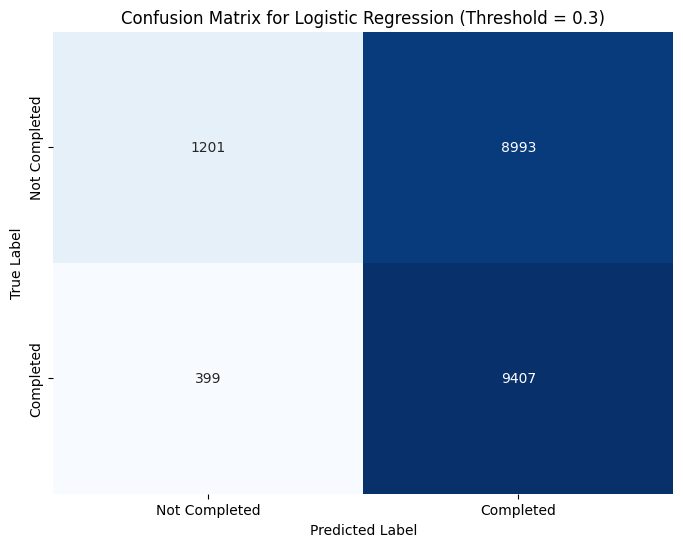

In [51]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Obtain probability predictions for the positive class from the log_reg_model
probabilities_log_reg = log_reg_model.predict_proba(X_test)[:, 1]

# 2. Apply a decision threshold of 0.3 to create new binary predictions
y_pred_log_reg_tuned_0_3 = (probabilities_log_reg >= 0.3).astype(int)

# 3. Calculate the confusion matrix for the new predictions
cm_log_reg_tuned = confusion_matrix(y_test, y_pred_log_reg_tuned_0_3)

# 4. Visualize the confusion matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm_log_reg_tuned, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Not Completed', 'Completed'],
            yticklabels=['Not Completed', 'Completed'])
plt.title('Confusion Matrix for Logistic Regression (Threshold = 0.3)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

## Generate and Visualize Confusion Matrix for Random Forest (Threshold 0.3)

### Subtask:
Recalculate predictions for the Random Forest model using a decision threshold of 0.3. Then, generate and visualize the confusion matrix for these new predictions using a heatmap with clear labels, title, and annotations.

```markdown
**Reasoning**:
Similar to the Logistic Regression model, a threshold of 0.3 was identified as a suitable balance for maximizing recall while maintaining reasonable accuracy and precision for the Random Forest model. I will now apply this specific threshold to the Random Forest model's probability predictions to generate a new set of binary predictions. Subsequently, I will compute and visualize the confusion matrix for these predictions to assess the model's performance more closely at this chosen threshold, specifically focusing on the trade-offs between false positives and false negatives.
```

```markdown
**Reasoning**:
Similar to the Logistic Regression model, a threshold of 0.3 was identified as a suitable balance for maximizing recall while maintaining reasonable accuracy and precision for the Random Forest model. I will now apply this specific threshold to the Random Forest model's probability predictions to generate a new set of binary predictions. Subsequently, I will compute and visualize the confusion matrix for these predictions to assess the model's performance more closely at this chosen threshold, specifically focusing on the trade-offs between false positives and false negatives.
```

**Reasoning**:
I will now implement the code to recalculate the Random Forest predictions using a 0.3 threshold and then visualize the corresponding confusion matrix, as detailed in the instructions.



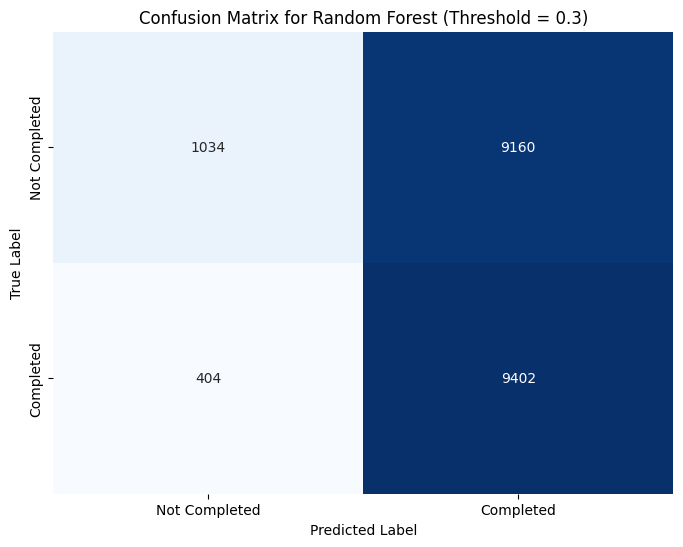

In [52]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Obtain probability predictions for the positive class from the rf_model
probabilities_rf = rf_model.predict_proba(X_test)[:, 1]

# 2. Apply a decision threshold of 0.3 to create new binary predictions
y_pred_rf_tuned_0_3 = (probabilities_rf >= 0.3).astype(int)

# 3. Calculate the confusion matrix for the new predictions
cm_rf_tuned = confusion_matrix(y_test, y_pred_rf_tuned_0_3)

# 4. Visualize the confusion matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf_tuned, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Not Completed', 'Completed'],
            yticklabels=['Not Completed', 'Completed'])
plt.title('Confusion Matrix for Random Forest (Threshold = 0.3)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

## Generate and Visualize Confusion Matrix for Gradient Boosting Classifier (Threshold 0.3)

### Subtask:
Recalculate predictions for the Gradient Boosting Classifier model using a decision threshold of 0.3. Then, generate and visualize the confusion matrix for these new predictions using a heatmap with clear labels, title, and annotations.

```markdown
**Reasoning**:
Similar to the Logistic Regression and Random Forest models, a threshold of 0.3 was identified as a suitable balance for maximizing recall while maintaining reasonable accuracy and precision for the Gradient Boosting Classifier model. I will now apply this specific threshold to the Gradient Boosting Classifier model's probability predictions to generate a new set of binary predictions. Subsequently, I will compute and visualize the confusion matrix for these predictions to assess the model's performance more closely at this chosen threshold, specifically focusing on the trade-offs between false positives and false negatives.
```

```markdown
```markdown
**Reasoning**:
Similar to the Logistic Regression and Random Forest models, a threshold of 0.3 was identified as a suitable balance for maximizing recall while maintaining reasonable accuracy and precision for the Gradient Boosting Classifier model. I will now apply this specific threshold to the Gradient Boosting Classifier model's probability predictions to generate a new set of binary predictions. Subsequently, I will compute and visualize the confusion matrix for these predictions to assess the model's performance more closely at this chosen threshold, specifically focusing on the trade-offs between false positives and false negatives.
```
```

**Reasoning**:
I will now implement the code to recalculate the Gradient Boosting Classifier predictions using a 0.3 threshold and then visualize the corresponding confusion matrix, as detailed in the instructions.



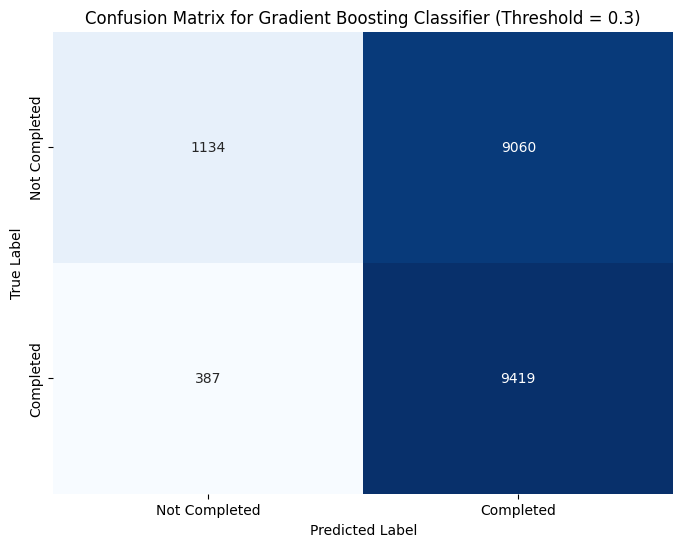

In [53]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Obtain probability predictions for the positive class from the gbc_model
probabilities_gbc = gbc_model.predict_proba(X_test)[:, 1]

# 2. Apply a decision threshold of 0.3 to create new binary predictions
y_pred_gbc_tuned_0_3 = (probabilities_gbc >= 0.3).astype(int)

# 3. Calculate the confusion matrix for the new predictions
cm_gbc_tuned = confusion_matrix(y_test, y_pred_gbc_tuned_0_3)

# 4. Visualize the confusion matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm_gbc_tuned, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Not Completed', 'Completed'],
            yticklabels=['Not Completed', 'Completed'])
plt.title('Confusion Matrix for Gradient Boosting Classifier (Threshold = 0.3)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Confusion Matrices analysis
The confusion matrices show that false negatives are minimized with the new decision matrix, but generates an extreme amount of false positives.

If there is any improvement to be done in this data pipeline, it would be to minimize false positives, which would drive up the accuracy and precision.

# Risk-tier classification as opposed to binary classification
Because the objective of the model is to detect students who need extra support in their online course, false positives are rather uncostly. <br>

A false positive only means that a student who doesn't need any support is offered extra support, where a false negative is where a failing student isn't offered help at all.

With the decision threshold as it is now, we will instead classify students into three groups:


*   High-risk: p $\ge$ 0.70
*   Medium-risk: 0.40 $\le$ p $\le$ 0.70
*   Low-risk: p $\le$ .40

This classification will more usefully provide instructors with information about their students



# Task
Classify students into risk tiers based on the Logistic Regression model's probability predictions (`probabilities_log_reg`). Students with `probabilities_log_reg` less than 0.40 will be categorized as 'High-risk', those with probabilities between 0.40 and 0.70 (exclusive of 0.70) as 'Medium-risk', and those with probabilities equal to or greater than 0.70 as 'Low-risk'. After classification, visualize the distribution of students across these risk categories using a count plot and summarize the implications of this multi-tier classification for educational interventions.

In [54]:
import pandas as pd
import numpy as np

# Ensure probabilities_log_reg is a pandas Series for easier indexing and concatenation if needed
# It's already an ndarray, so we can use it directly with np.select

# Define the conditions for each risk tier
conditions = [
    probabilities_log_reg < 0.40,
    (probabilities_log_reg >= 0.40) & (probabilities_log_reg < 0.70),
    probabilities_log_reg >= 0.70
]

# Define the corresponding choices for each risk tier
choices = ['High-risk', 'Medium-risk', 'Low-risk']

# Classify students into risk tiers
risk_tiers = pd.Series(np.select(conditions, choices, default='Unknown'), index=y_test.index)

print("Student risk tiers have been classified:")
print(risk_tiers.value_counts())
print("\nFirst 5 risk tier classifications:")
print(risk_tiers.head())

Student risk tiers have been classified:
Medium-risk    13862
High-risk       5100
Low-risk        1038
Name: count, dtype: int64

First 5 risk tier classifications:
80345    Medium-risk
47840      High-risk
65095    Medium-risk
144      Medium-risk
94844       Low-risk
dtype: object


**Reasoning**:
Now that the students have been classified into risk tiers, I will visualize the distribution of these tiers using a count plot as specified in the main task. This will provide a clear overview of the proportion of students in each risk category.



/tmp/ipython-input-3688662283.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=risk_tiers, order=['Low-risk', 'Medium-risk', 'High-risk'], palette='viridis')


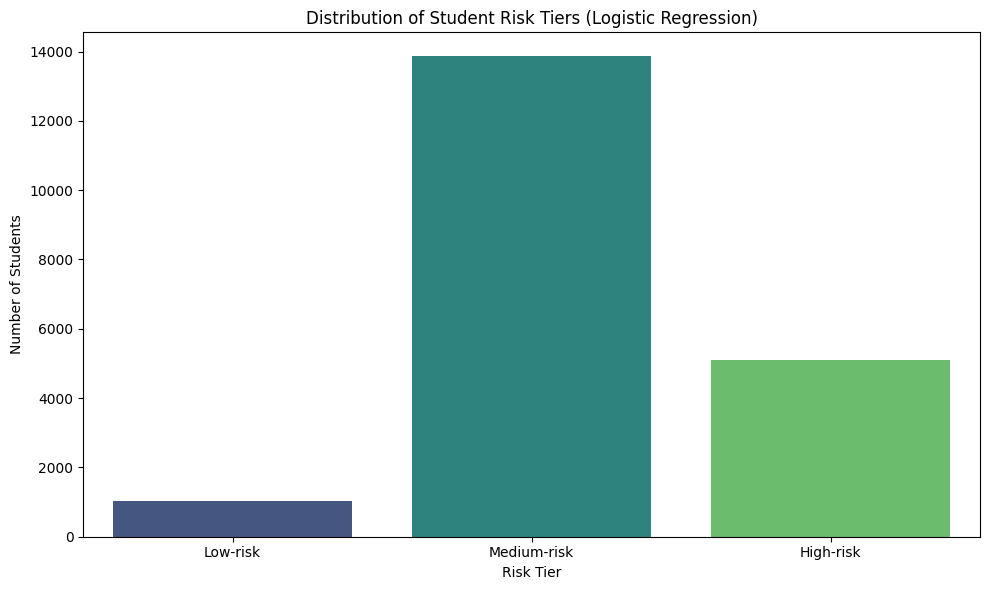

In [55]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualize the distribution of risk tiers
plt.figure(figsize=(10, 6))
sns.countplot(x=risk_tiers, order=['Low-risk', 'Medium-risk', 'High-risk'], palette='viridis')
plt.title('Distribution of Student Risk Tiers (Logistic Regression)')
plt.xlabel('Risk Tier')
plt.ylabel('Number of Students')
plt.tight_layout()
plt.show()

**Reasoning**:
The previous code produced a `FutureWarning` because `palette` was used without `hue` in `sns.countplot`. To fix this and follow the recommended practice, I will assign the `x` variable to `hue` and set `legend=False`.



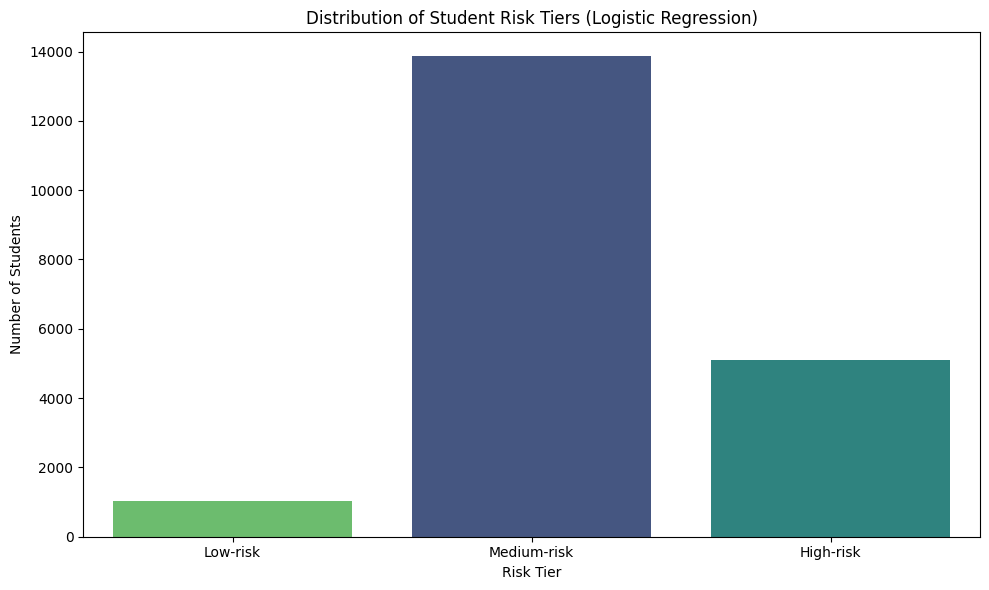

In [56]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualize the distribution of risk tiers
plt.figure(figsize=(10, 6))
sns.countplot(x=risk_tiers, hue=risk_tiers, order=['Low-risk', 'Medium-risk', 'High-risk'], palette='viridis', legend=False)
plt.title('Distribution of Student Risk Tiers (Logistic Regression)')
plt.xlabel('Risk Tier')
plt.ylabel('Number of Students')
plt.tight_layout()
plt.show()

# Conclusion
Given the difficult to predict data of this model, it was most beneficial to prioritize minimizing of false negatives rather than fruitlessly trying to maximize accuracy of the model. Upon doing this, a large number of false positives were generated. <br>

Since false positives are a very low-consequence error for this task, it was most beneficial to change the task of the model to classify students as one of three levels of "risk" to better remedy their chance of failing the class. <br>

The model assesses student's course data and is able to determine their risk of failing the class.